<div class="alert alert-block alert-success">
    <h2 style="text-align: center;">Chicago Crimes</h2>
    <p><strong>Author:</strong> Atef Bader, PhD</p>
    <p><strong>Revised By:</strong> Edward Arroyo, PhD</p>
</div>

<div class="alert alert-block alert-danger">
    
## Deliverables:

You are required to submit **three** files with the naming convention <font color = 'red'> <b>LastName_Assignment_4<b> </font>:  

1. **IPYNB Script**: This is your original notebook file ( <font color = 'red'> <b> LastName_Assignment_4.ipynb<b> </font>).  

2. **HTML Document**: This file must include all the source code you have written along with its output. This should include your source code and output. Follow these steps to generate the HTML file: 

   - After completing your work in the Jupyter Notebook, go to the menu bar at the top. 

   - Click on File, then hover over Download as. 

   - Select HTML (.html) 

   - Save the file with the appropriate naming convention ( <font color = 'red'> <b>LastName_Assignment_4.html</b> </font>). 
   - **Ensure all code and outputs are properly displayed in the HTML document.**

3. **MP4 Video Recording:** A live demo recording lasting between 5 and 10 minutes

**Note**: You are required to provide your code and its output immediately following each requirement for this assignment.
    
</div>

<div class="alert alert-info">
    


# Objectives:

- Use SQL to execute different queries to retrieve data from Chicago Crime dataset and Police statins dataset
- Use Geospatial queries  to locate **police stations** and **gun** related crimes (with arrest or no arrest) in every district on **Choropleth** map
- Use Geospatial queries  to provide **descriptive stat** for every **district** on Choropleth map
- Use Geospatial queries  to locate the **Block** that is the furthest (Maximum Distance) from the police station that has gun related crime resulted in arrest


<br>
</div>



# Formatting Python Code:

When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code: http://pep8.org/ (Links to an external site.)Links to an external site. There is the Google style guide for Python at https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site. Comment often and in detail.



# Descriptions and Requirement Specifications

# Chicago Police Department

Chicago police department  __[CPD](https://home.chicagopolice.org/community/districts/11th-district-harrison/)__  issues and publishes on daily basis on its website crime alerts, and press releases for the different __[districts](https://home.chicagopolice.org/community/districts/)__ .

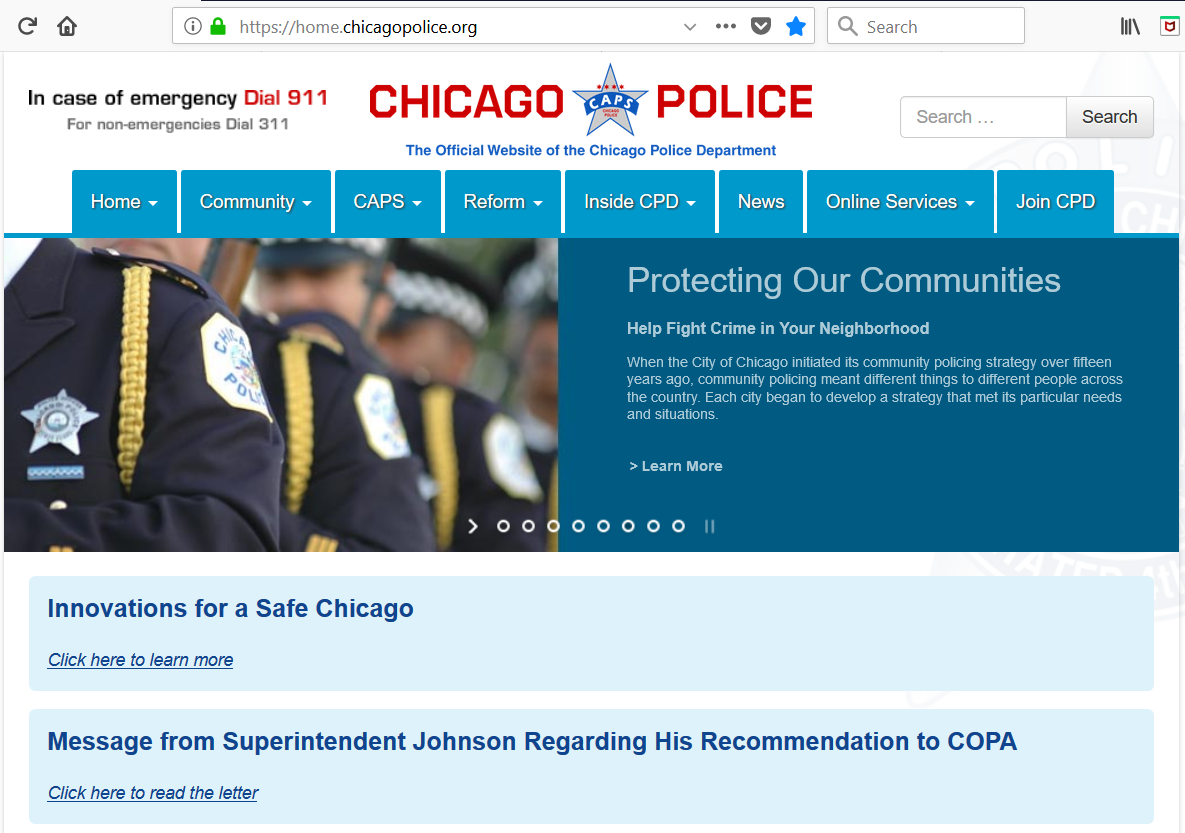



# The CPD categoizes the crimes into 8 categories as follows:

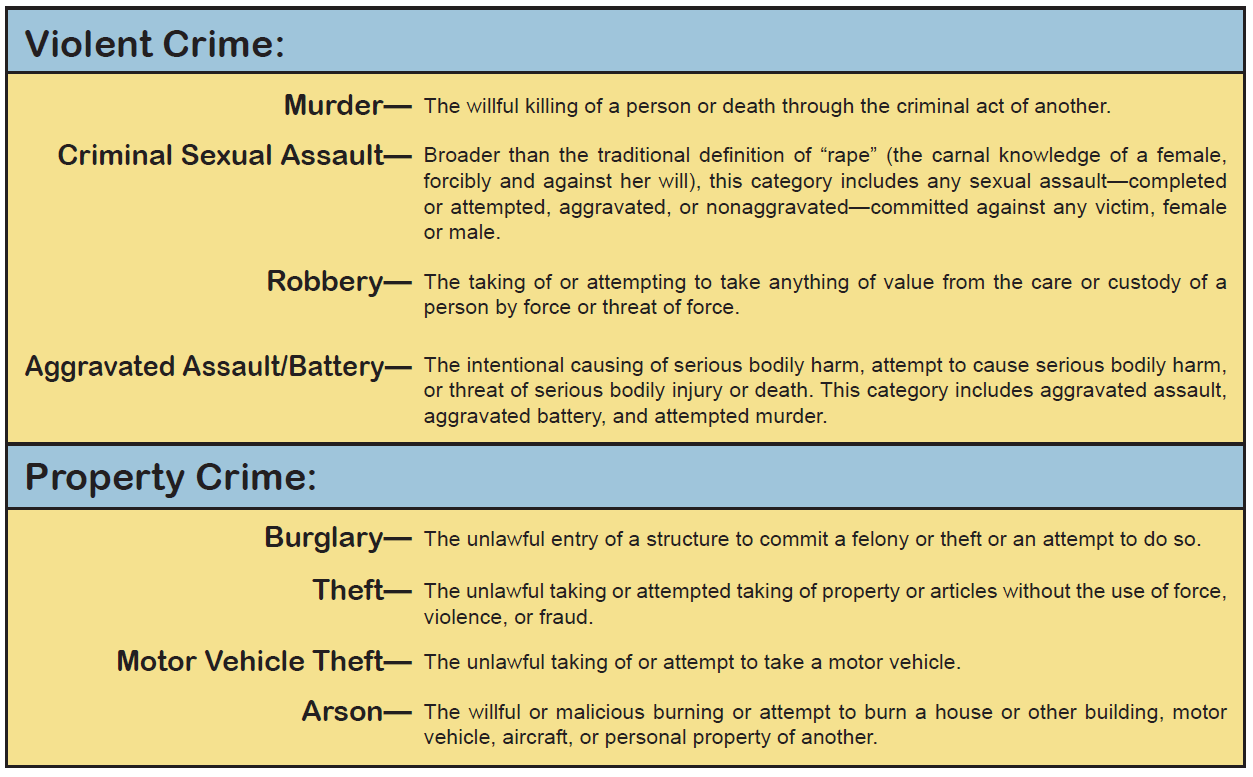


# Chicago Crimes Dataset

The crimes dataset for the city of Chicago that we will be using was obtained from the data portal for the city of Chicago. Here is the link for the city of Chicago data portal __[City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)__ 

The crime dataset for the city of Chicago that we will be utilizing was sourced from the City of Chicago's data portal. Here is the link to the City of Chicago Data Portal: [City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).


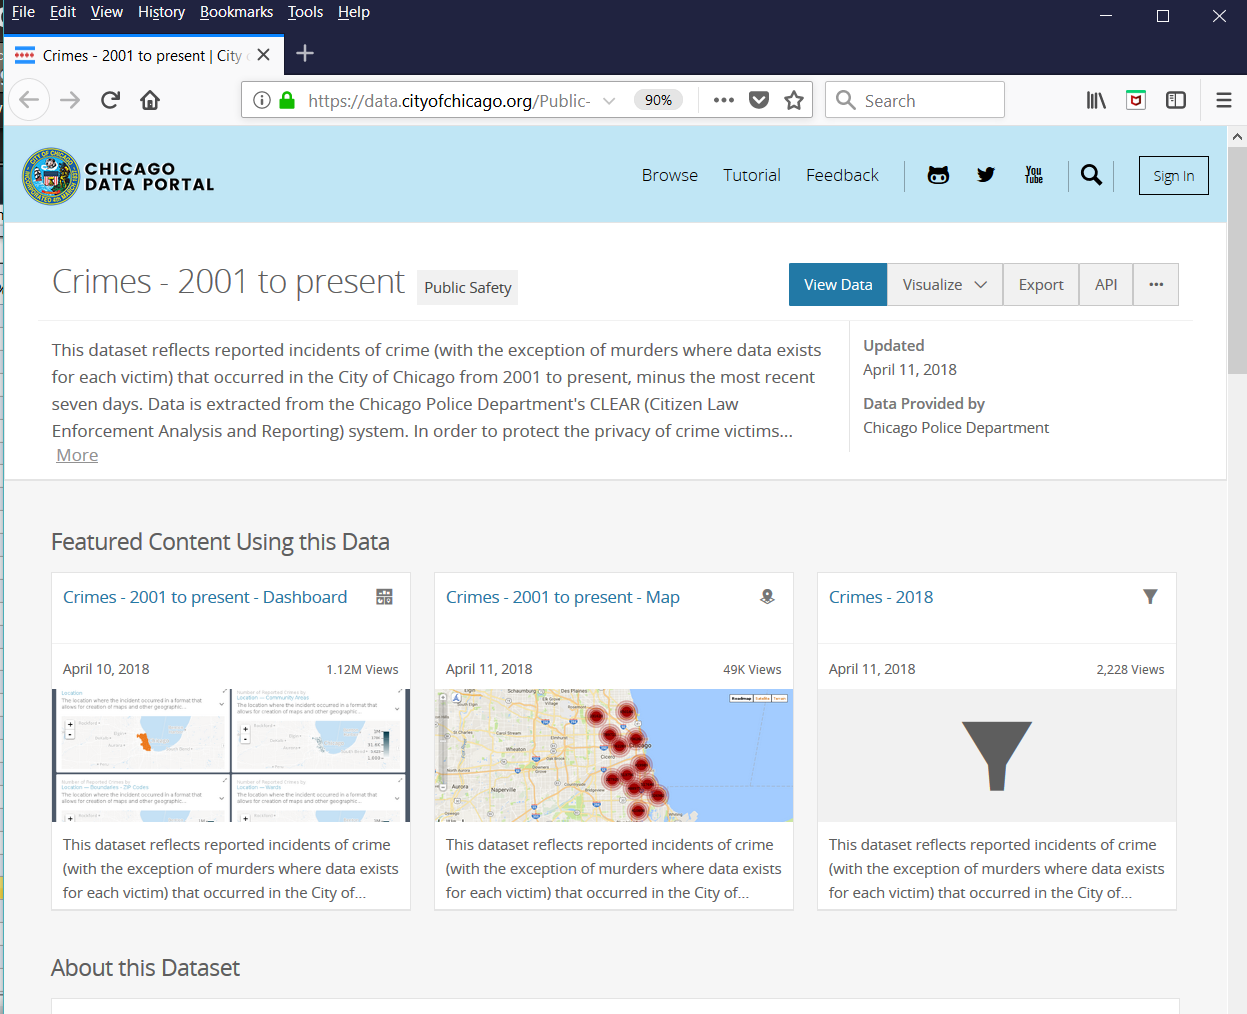

# Chicago Crimes Dataset
The crime dataset for the city of Chicago that we will be utilizing was sourced from the City of Chicago's data portal. Here is the link to the City of Chicago Data Portal: [City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

### Loading the Dataset

Three sets of data are needed for this assignment:
1. The list of Chicago police stations in each district (hosted on the NU server).
2. The Crimes dataset (hosted on the NU server).
3. The Boundaries.geojson data for district boundaries (downloaded in a Zip file).

A complete description of the dataset can be found on the Chicago City Data Portal.

In light of President Trump's State of the Union Address and the article by columnist Clarence Page, published by the Chicago Tribune, we aim to retrieve data from the past two years to perform various types of spatial queries.

We are particularly interested in a few queries to assist the Chicago Police Department (CPD) and the city of Chicago in plotting on a Choropleth map those districts with the highest gun crime rates.

Here are examples of the types of queries we are interested in:

1. Plot on a **Choropleth map** the **districts** and their **Violent Crimes**.
2. Plot on a Choropleth map the districts and their **Gun-related** crimes.
3. Identify the **crime capital** among the **Chicago districts**.
4. Determine the **crime density** per **district**.
5. Plot on a Choropleth map those **gun-related crimes** that resulted in **arrests**.
6. Plot on a Choropleth map the gun-related crime that occurred at the **farthest block** from the **police station** in each **district**.

To connect to a PostgreSQL server and load and retrieve the Chicago Crime dataset from the database, you will need the following packages:
<font color=purple>
1. **psycopg2:** This serves as the PostgreSQL driver.
2. **area:** This is used to calculate the area within any GeoJSON geometry.
3. **Folium:** This is essential for creating Choropleth maps.</font>

As we are incorporating PostGIS in our project, please read and bookmark [Chapter 4. Using PostGIS: Data Management and Queries](https://postgis.net/docs/manual-1.4/ch04.html)."

### Install These Three Packages 

Run the following three cells *once* to install these 3 packages. Afterwards, comment out the code.

In [1]:
# This script installs the 'psycopg2-binary' package, which is required for PostgreSQL database interactions.
# Note: This cell only needs to be executed once. 
# After successful installation, you can comment out this cell to avoid reinstallation in future runs.
import sys
!{sys.executable} -m pip install psycopg2-binary

In [2]:
# Install the 'area' package using pip in the current Jupyter kernel.
# Note: This cell only needs to be executed once. After installation, you can comment it out or delete it to prevent repeated installations in future runs.
!{sys.executable} -m pip install area

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for area: filename=area-1.1.1-py3-none-any.whl size=3623 sha256=36d584a51a6c1d965c4b0d13eab95639aed6349fe18a25fcfdaa31136a83a10a
  Stored in directory: c:\users\zhaox\appdata\local\pip\cache\wheels\93\11\25\9101ea5a0f1b69310cc188e146bbec38275aaf816391437324
Successfully built area


In [3]:
# Install the 'folium' package using pip in the current Jupyter kernel.
# Note: This cell only needs to be executed once. After installation, you can comment it out or delete it to prevent repeated installations in future runs.
!{sys.executable} -m pip install folium

     -------------------------------------- 100.0/100.0 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB ? eta 0:00:00


### Import Required Libraries and Modules:

In [1]:
import folium # To create maps with the Folium library. 
from folium import plugins # To use specific plugins from Folium, like marker clustering, heatmaps, etc. 
from folium.plugins import MarkerCluster # To create marker clusters on the map. See Query 5.
import psycopg2 # PostgreSQL database adapter for Python. Used to connect to and interact with the database.
import pandas as pd
import json  #  To read the GeoJSON data (Boundaries.geojson)
from area import area # To calcuse the area of geographical regions defined in the GeoJSON file (Boundaries.geojson)
import matplotlib.pyplot as plt  # To create annual trend analysis plot.

### Check Versions:

In [2]:
folium.__version__

'0.16.0'

In [3]:
psycopg2.__version__

'2.9.9 (dt dec pq3 ext lo64)'

<hr style="border:5px solid orange "> </hr>

# Docker

### Docker 101 Tutorial
Before you start the download/installation of Docker Desktop, watch the **Docker Crash Course for Absolute Beginners** video below.


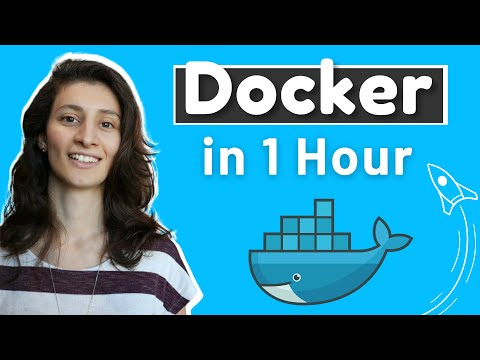

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('pg19Z8LL06w', width=600, height=350)

<br><br>
<hr style="border:5px solid orange "> </hr>

## Install Docker Desktop from here: https://docs.docker.com/engine/install/


<br><br>

<div>
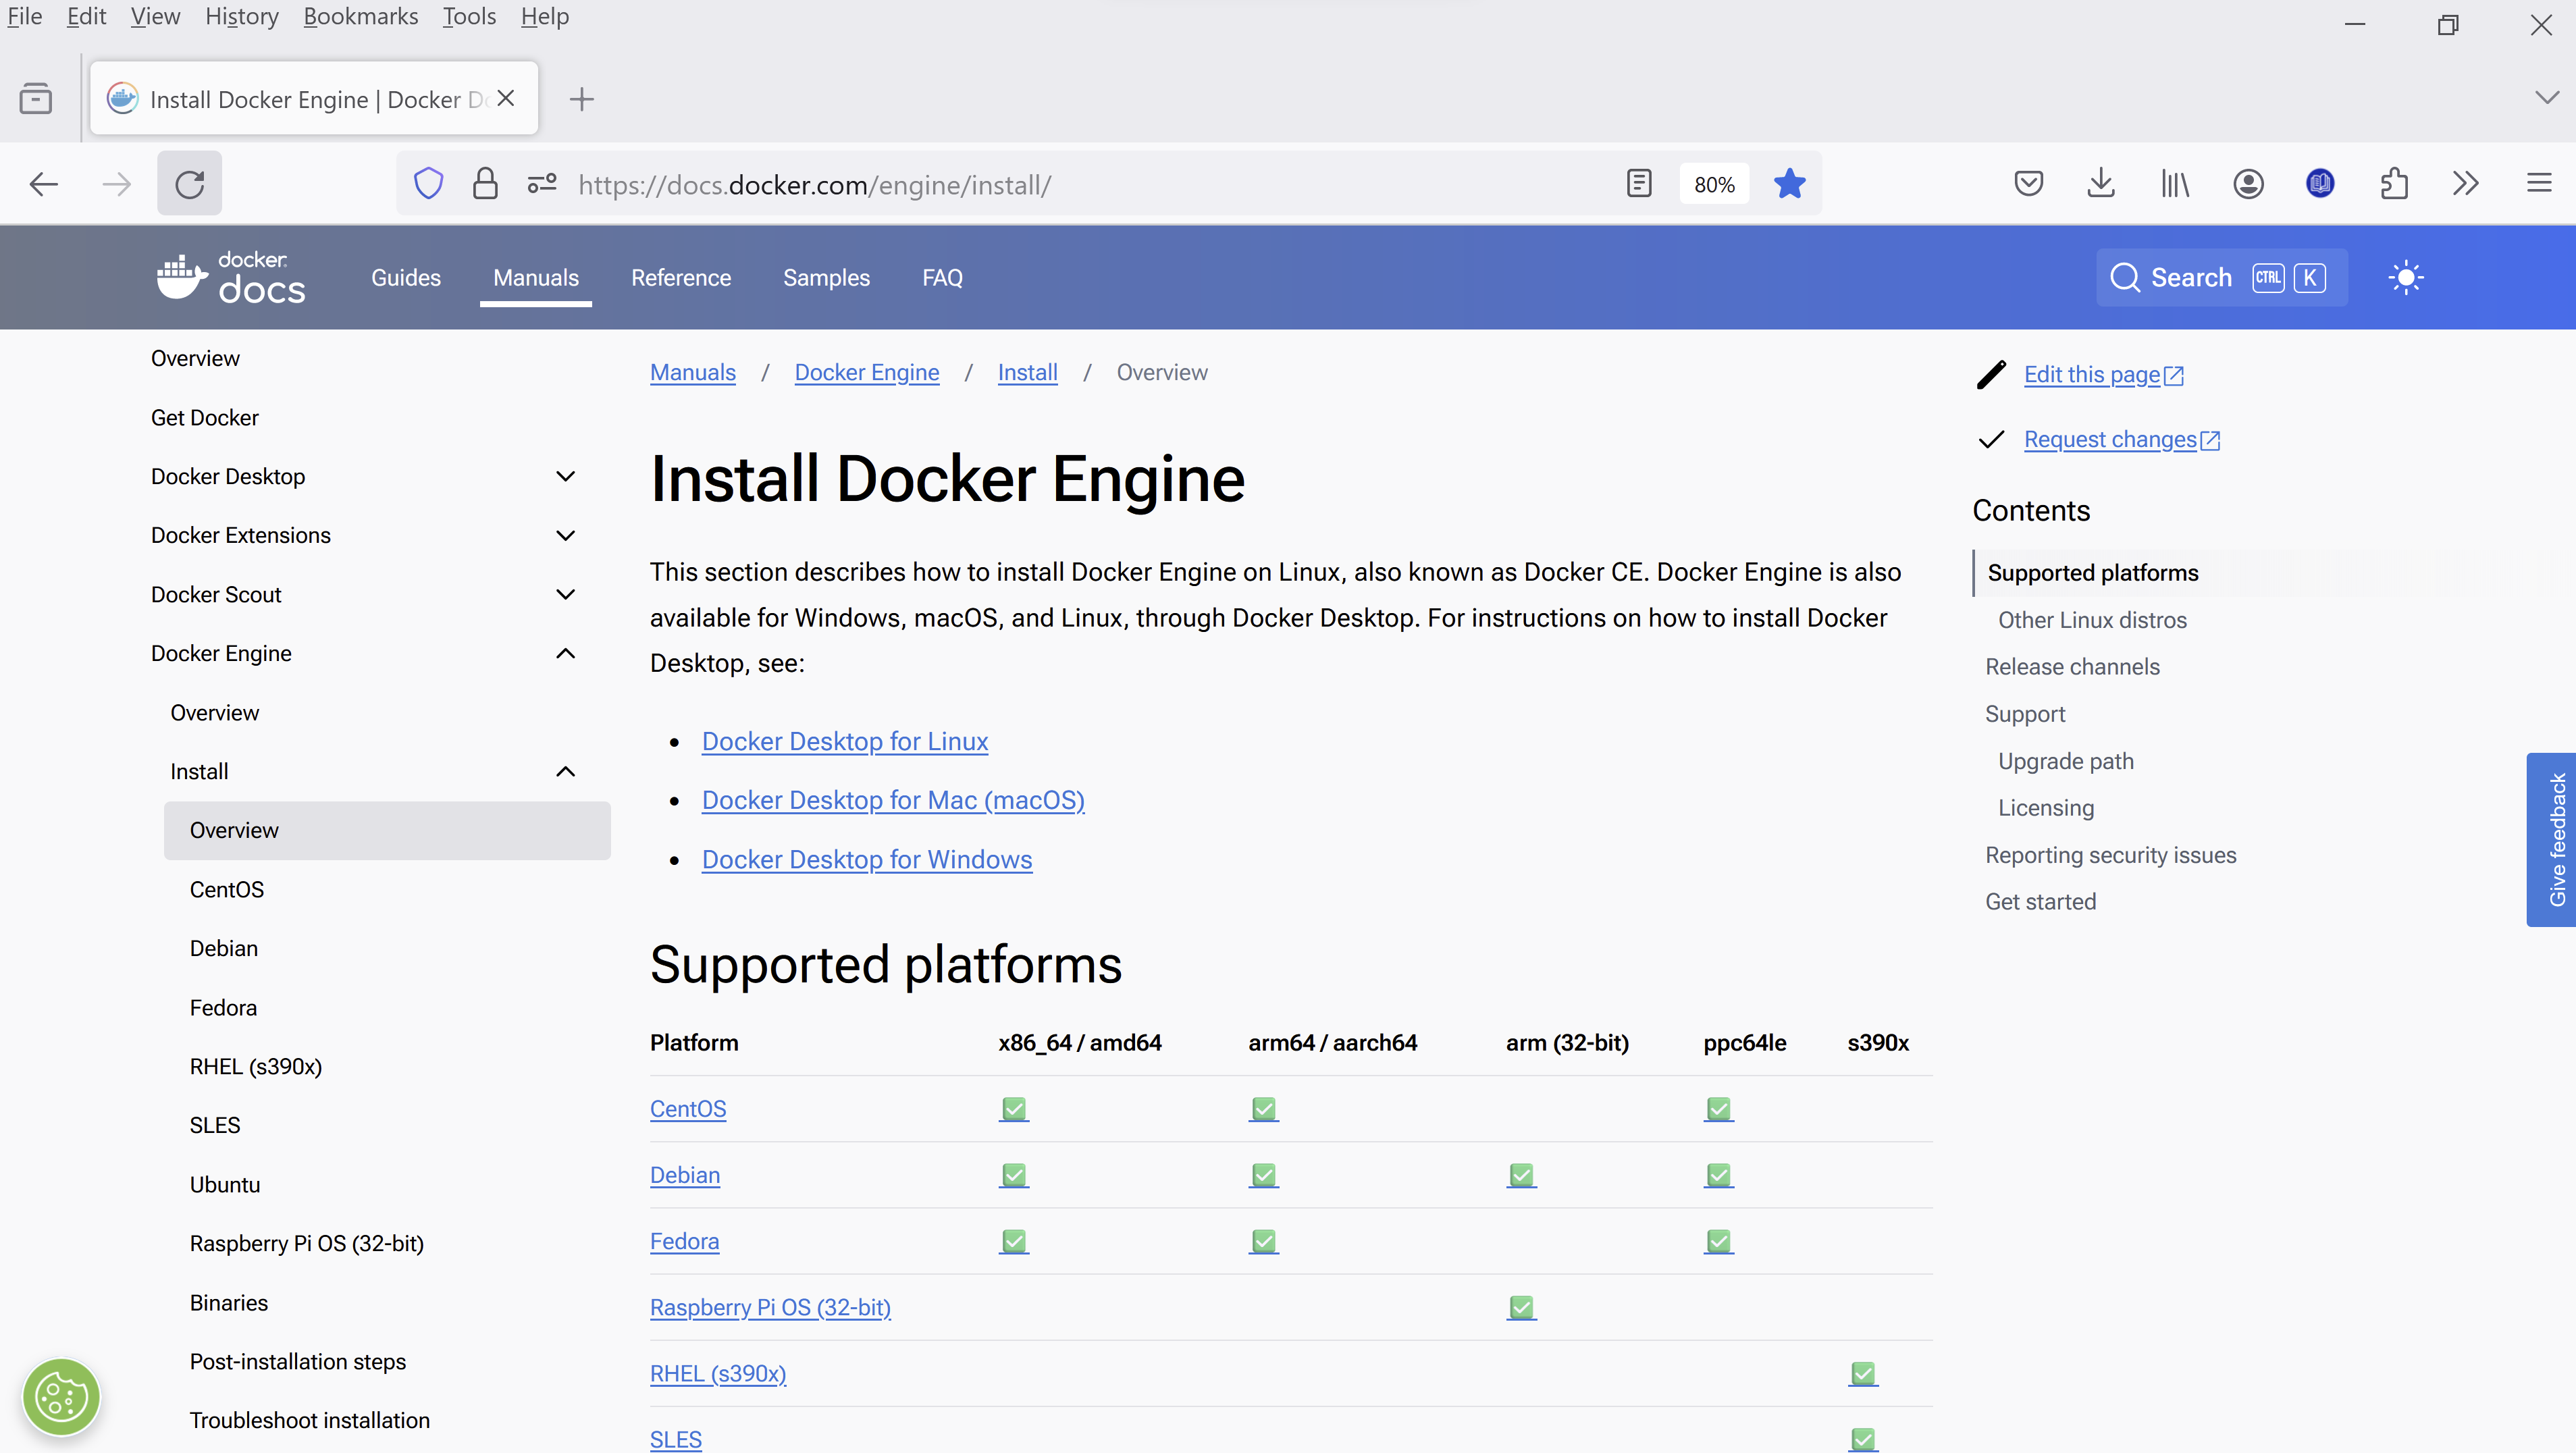
</div>

<br><br>

<hr style="border:5px solid orange "> </hr>


<div class="alert alert-info">
<hr style="border:5px solid red"></hr>

#### The following cell/command starts up the Docker Container from Postgres-14 image that has Chicago Crimes Data
#### Please wait 5 minutes for the docker container to complete its startup  before you proceed to subsequent steps

<hr style="border:5px solid red"></hr>

</div>




In [5]:
!docker-compose up -d

 Container chicago_crimes  Running


<hr style="border:5px solid orange "> </hr>


<br><br>

## From the Docker Desktop under Images verify you see msds420/postgres-14 as follows:


<br><br>

<div>
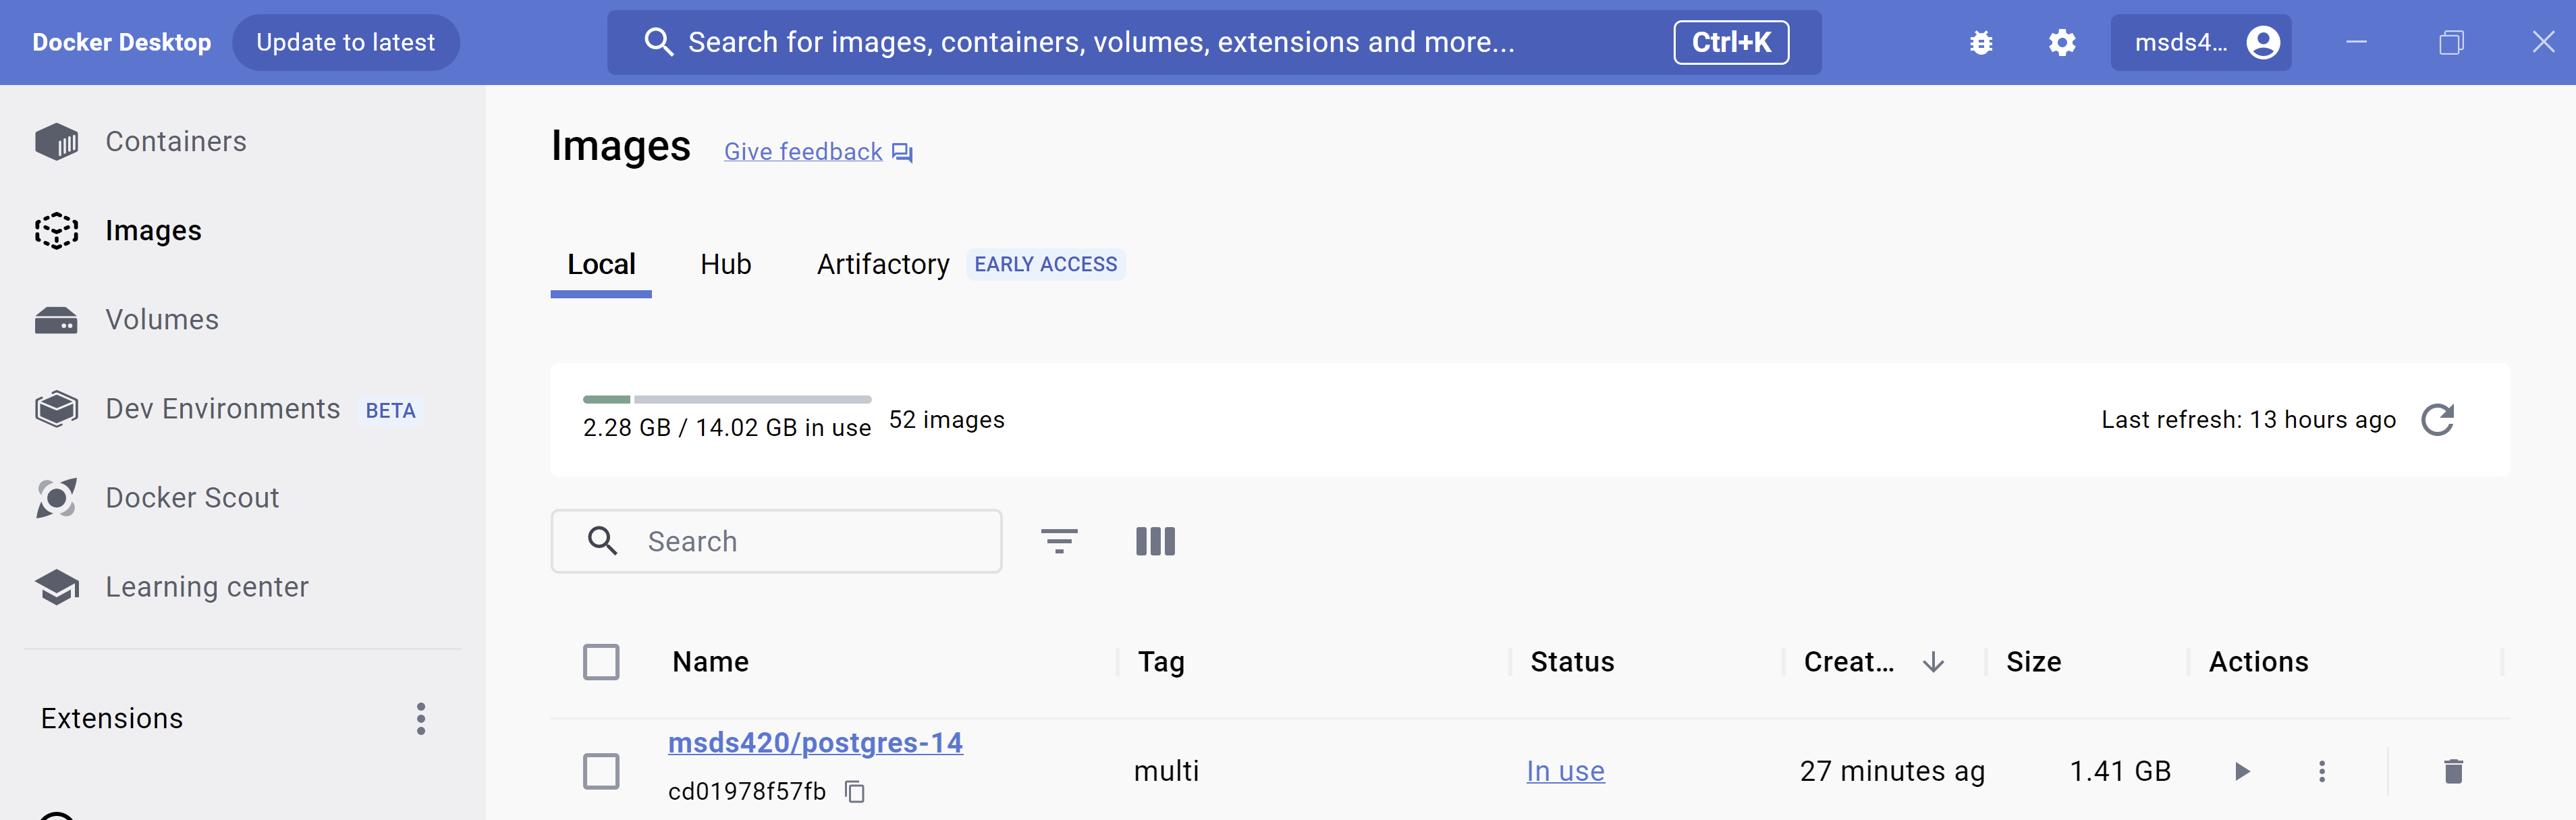
</div>

<hr style="border:5px solid orange "> </hr>


### <font color='red'> Please wait 5 minutes before you execute the following cells. </font>
### <font color='red'> It takes the Docker Postgres-14 container roughly 3 minutes to finalize its startup </font>

<hr style="border:5px solid orange "> </hr>

# Important Notes:

- For the 'dbname' in the statements below, use 'chicago_crimes_ut' as your database when debugging/testing your code. For your final submission, switch to 'chicago_crimes' as your database.

In [6]:
# Use this dataset for your final submission of Assignment 4.
# Uncomment the following line after you have unit tested your code and are ready to run and submit your assignment on this dataset.


# =======================================================================================================

# Use the following dataset for unit testing purposes only.
# Comment out the following line when you are done with your unit testing and ready to run your assignment on the complete dataset and submit Assignment 4.

#db_connection = psycopg2.connect(host='127.0.0.1', port=5437, dbname="chicago_crimes", user="postgres" , password="root")

db_connection = psycopg2.connect(host='127.0.0.1', port=5437, dbname="chicago_crimes_ut", user="postgres" , password="root")

db_connection.set_session(autocommit=True)

cursor = db_connection.cursor()


In [7]:
# If your transactions ever get "stuck":
# ...current transaction is aborted, commands ignored until end of transaction block...
# uncomment and excute the following line.
# db_connection.rollback()

### Chicago Crimes Dataset

The dataset we will be working with has been sourced from the **Chicago Data Portal** and comprises approximately 6.5 million records.

When working this dataset, it is important to consider the following:
1. Geospatial queries place significant demands on system resources, such as CPU, Memory, and Disk.
2. Our focus is on the dataset spanning the years 2016 to 2018. It should be noted that executing geospatial-type queries can considerably slow down your machine.
3. You will be using two datasets for this assignment:
    - **chicago_crimes_ut**: This smaller dataset, containing data for about a month, should be used for coding/debugging and unit testing.
    - **chicago_crimes**: This larger dataset, which includes data from 2016 to 2018, should be used for your final submission.

### Algorithm Performance

- **Sorting algorithms** used by database engines vary in efficiency, typically ranging from O($N \log N$) to O($N^2$), where $N$ is the number of records.

- **Searching algorithms** used by database engines also vary in efficiency, typically ranging from O($\log N$) to O($N$), where $N$ is the number of records.

### Let's explore the *two* tables we will be using from the Chicago crimes database.

In [8]:
# Get the column names for table crimes

cursor.execute("SELECT column_name \
    FROM INFORMATION_SCHEMA.COLUMNS \
    WHERE table_name = 'crimes';")

rows=cursor.fetchall()

rows

[('where_is',),
 ('district',),
 ('ward',),
 ('xcoordinate',),
 ('ycoordinate',),
 ('year',),
 ('updated_on',),
 ('latitude',),
 ('longitude',),
 ('id',),
 ('date_of_occurrence',),
 ('arrest',),
 ('domestic',),
 ('beat',),
 ('caseno',),
 ('community_area',),
 ('block',),
 ('iucr',),
 ('primary_type',),
 ('description',),
 ('location_description',),
 ('fbi_cd',),
 ('location',)]

In [9]:
# Get the column names for table police_stations

cursor.execute("SELECT column_name \
    FROM INFORMATION_SCHEMA.COLUMNS \
    WHERE table_name = 'police_stations';")

rows=cursor.fetchall()

rows

[('x_coordinate',),
 ('y_coordinate',),
 ('latitude',),
 ('longitude',),
 ('zip',),
 ('where_is',),
 ('phone',),
 ('district',),
 ('tty',),
 ('location',),
 ('fax',),
 ('district_name',),
 ('address',),
 ('city',),
 ('state',),
 ('website',)]

In [10]:
# Get the first five rows of the police station table
query = '''
        SELECT * 
        FROM police_stations
'''

# Execute the SQL query using the cursor object.
cursor.execute(query)

# Fetch all the rows returned by the executed query.
data = cursor.fetchall()

# Retrieve column names 
colnames = [desc[0] for desc in cursor.description]

# Create a DataFrame using the fetched data and the column names.
stations = pd.DataFrame(data, columns=colnames)

# Display the first five rows.
stations.head()

,district,district_name,address,city,state,zip,website,phone,fax,tty,x_coordinate,y_coordinate,latitude,longitude,location,where_is
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)",0101000020E61000009AEA2C27DFED444001467E9A26E8...
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)",0101000020E6100000608FECBEA1E64440A2D015195BE8...
2,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)",0101000020E6100000DB984B681AE244409B14AC92C4E6...
3,4,South Chicago,2255 E 103rd St,Chicago,IL,60617,http://home.chicagopolice.org/community/distri...,312-747-7581,312-747-5276,312-747-9169,1193131.299,1837090.265,41.707933,-87.568349,"(41.7079332906, -87.5683491228)",0101000020E61000005C26DC8E9DDA444010C7FCD45FE4...
4,5,Calumet,727 E 111th St,Chicago,IL,60628,http://home.chicagopolice.org/community/distri...,312-747-8210,312-747-5935,312-747-9170,1183305.427,1831462.313,41.692723,-87.604506,"(41.6927233639, -87.6045058667)",0101000020E61000000830B828ABD84440F6786339B0E6...


In [11]:
# Store districts (excluding Headquarters) for later use
districts = stations.query("district != 'Headquarters'").district.unique()
districts

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '14', '15', '16', '17', '18', '19', '20', '22', '24', '25'],
      dtype=object)

In [12]:
# Display the first 5 rows in the crimes table
query = '''
        SELECT *
        FROM crimes
'''
cursor.execute(query)
data = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
chicago = pd.DataFrame(data,columns = colnames)
chicago.head()

,id,caseno,date_of_occurrence,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_cd,xcoordinate,ycoordinate,year,updated_on,latitude,longitude,location,where_is
0,24368,JC103046,2019-01-03 14:37:00,050XX S INDIANA AVE,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,38,01A,1178455.0,1871575.0,2019,2019-01-10 15:16:00,41.802909,-87.621048,"(41.802908524, -87.62104831)",0101000020E6100000368AD5B4C5E64440E92B6941BFE7...
1,24369,JC103046,2019-01-03 14:37:00,050XX S INDIANA AVE,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,38,01A,1178455.0,1871575.0,2019,2019-01-10 15:16:00,41.802909,-87.621048,"(41.802908524, -87.62104831)",0101000020E6100000368AD5B4C5E64440E92B6941BFE7...
2,24370,JC105864,2019-01-05 16:23:00,012XX N ADA ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,24,01A,1167119.0,1908611.0,2019,2019-01-18 09:37:00,41.904789,-87.661560,"(41.904788891, -87.66155984)",0101000020E6100000C52A521FD0F34440684915FF56EA...
3,24372,JC107385,2019-01-06 22:23:00,060XX W 63RD ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,64,01A,1137054.0,1862130.0,2019,2019-01-18 09:37:00,41.777831,-87.773112,"(41.77783091, -87.773112387)",0101000020E61000004B2298F68FE34440ACCB63AC7AF1...
4,24373,JC108358,2019-01-07 15:45:00,002XX W 87TH ST,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,44,01A,1176442.0,1847223.0,2019,2019-01-18 09:37:00,41.736129,-87.629162,"(41.736129473, -87.629162044)",0101000020E6100000CBA28F7D39DE4440D16BDC3044E8...


**DATA DICTIONARY (CRIMES)** (See https://www.kaggle.com/currie32/crimes-in-chicago)

**id** - Unique identifier for the record.

**caseno** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

**date_of_occurence** - Date when the incident occurred. this is sometimes a best estimate.

**block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

**iucr** - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

**primary_type** - The primary description of the IUCR code.

**description** - The secondary description of the IUCR code, a subcategory of the primary description.

**location-description** - Description of the location where the incident occurred.

**arrest** - Indicates whether an arrest was made.

**domestic** - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

**beat** - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

**district** - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

**ward** - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

**community_area** - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

**fbi_cd** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

**xcoordinate** - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**ycoordinate** - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**year** - Year the incident occurred.

**updated_on** - Date and time the record was last updated.

**latitude** - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**longitude** - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**location** - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [13]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14436 entries, 0 to 14435
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    14436 non-null  int64         
 1   caseno                14436 non-null  object        
 2   date_of_occurrence    14436 non-null  datetime64[ns]
 3   block                 14436 non-null  object        
 4   iucr                  14436 non-null  object        
 5   primary_type          14436 non-null  object        
 6   description           14436 non-null  object        
 7   location_description  14436 non-null  object        
 8   arrest                14436 non-null  bool          
 9   domestic              14436 non-null  bool          
 10  beat                  14436 non-null  int64         
 11  district              14436 non-null  int64         
 12  ward                  14436 non-null  float64       
 13  community_area  

In [14]:
# use value_counts to see the values of the field
chicago['year'].value_counts()

2019    14436
Name: year, dtype: int64

## Let's start executing different  Queries

# Query 1:
- Calculate the total number of **crimes** in each district and display this data on a Choropleth map. Essentially, create a Choropleth map where the shading of each district corresponds to the number of **crimes** in that district.

In [15]:
# Retrieve the total number of crimes for each district.
# As each row in the database represents a single crime, count the number of rows associated with each district.

cursor.execute("SELECT district, count(district) \
                FROM crimes \
                GROUP BY district")
rows = cursor.fetchall()

In [16]:
# Create a dataframe from the results of the query.
crimes_per_district = pd.DataFrame(rows, columns=['dist_num','number_of_crimes'])
crimes_per_district['dist_num'] = crimes_per_district['dist_num'].astype(str)

crimes_per_district

,dist_num,number_of_crimes
0,24,412
1,11,1113
2,8,886
3,19,608
4,25,726
5,4,790
6,14,508
7,3,695
8,17,386
9,20,254


In [17]:
# Retrieve the latitude and longitude of the police station in each district, excluding the headquarters.
# These coordinates will typically be used to place markers on the map at the locations of the police stations.
cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district \
            FROM police_stations \
            WHERE district!='Headquarters'""")
police_stations = cursor.fetchall()

# Create a dataframe with this information.
station_locations = pd.DataFrame(police_stations,columns=['st_latitude','st_longitude','dist_num']).drop_duplicates()

station_locations


,st_latitude,st_longitude,dist_num
0,41.858373,-87.627356,1
1,41.801811,-87.630560,2
2,41.766431,-87.605748,3
3,41.707933,-87.568349,4
4,41.692723,-87.604506,5
5,41.752137,-87.644229,6
6,41.779632,-87.660887,7
7,41.778987,-87.708864,8
8,41.837394,-87.646408,9
9,41.856685,-87.708382,10


In [18]:
# Add columns to store the coordinates of each district.
# These coordinates will represent the locations of our markers.

query1_df = pd.merge(crimes_per_district, station_locations,on='dist_num')
query1_df

,dist_num,number_of_crimes,st_latitude,st_longitude
0,24,412,41.999763,-87.671324
1,11,1113,41.873582,-87.705488
2,8,886,41.778987,-87.708864
3,19,608,41.947400,-87.651512
4,25,726,41.918609,-87.765574
5,4,790,41.707933,-87.568349
6,14,508,41.921103,-87.697452
7,3,695,41.766431,-87.605748
8,17,386,41.966053,-87.728115
9,20,254,41.979550,-87.692845


# Creating the folium maps

In [19]:
# Create a Folium map centered on Downtown Chicago.
total_number_of_crimes_per_district_map = folium.Map(location = (41.8781, -87.6298),zoom_start = 11)

In [20]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the crime rate.
# The number of crimes in each district is specified in the 'number_of_crimes' column 
# of the 'crimes_per_district' data frame.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of crime rates by district.

folium.Choropleth(
    geo_data="Boundaries.geojson",  # GeoJSON file containing district boundaries
    fill_color='OrRd',  # Shade districts in orange red gradient
    fill_opacity=0.5,   # Set fill opacity for the shaded areas
    line_opacity=1,     # Set line opacity for district boundaries
    data=crimes_per_district,  # Data source for crime statistics
    key_on='feature.properties.dist_num',  # GeoJSON property to match the district number
    columns=['dist_num', 'number_of_crimes'],  # Columns for district number and crime count
    legend_name="CRIMES PER DISTRICT"  # Title for the map legend
).add_to(total_number_of_crimes_per_district_map)  # Add the choropleth layer to the folium map


In [21]:
# We iterate over the rows in the dataframe, 'query1_df'.
# For each row, we create a marker representing a police station.
# The popup label for each marker displays the district number and the total number of crimes in that district.
# Each marker is placed at the corresponding latitude and longitude coordinates of the police station.
for index, row in query1_df.iterrows():
    # Extracting the latitude and longitude of the police station from the row.
    police_station_location = (row['st_latitude'], row['st_longitude'])
    # Extracting the district number and number of crimes from the row.
    district = row['dist_num']
    num_crimes = row['number_of_crimes']
            
    # Creating a marker with a popup that shows the district number and number of crimes.
    # The marker is then added to the 'total_number_of_crimes_per_district_map' map.
    folium.Marker(
        location=police_station_location, 
        popup=folium.Popup(html=f"District No : {district} has Total Number of Crimes: {num_crimes}", max_width=450)
    ).add_to(total_number_of_crimes_per_district_map)


- **Lets plot the Choropleth map and notice  the intensity of color on the different districts**
- **The Blue POPUP represents the location of police station in the different districts in the map**

In [1]:
# Display the finished map.
total_number_of_crimes_per_district_map

## Query 2:
* Calculate the total number of **violent crimes** in each district and display it on a Choropleth map, where the shading intensity corresponds to the number of violent crimes in each district. A crime is classified as a **violent crime** if its PRIMARY_TYPE is `THEFT`, `ASSAULT`, `ROBBERY`, `KIDNAPPING`, `CRIM SEXUAL ASSAULT`, `BATTERY`, or `MURDER`.

* Additionally, calculate the total number of crimes for each of these primary types of violent crime within each district. Then, add a popup marker at the location of each district's police headquarters on the map. This popup should show a DataFrame detailing the counts of each type of violent crime in that district.

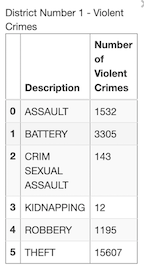

In [23]:
violent_crime_categories = 'THEFT','ASSAULT','ROBBERY','KIDNAPPING','CRIM SEXUAL ASSAULT','BATTERY','MURDER'

In [24]:
# Get the total number of violent crimes per district. This info will populate the legend.
cursor.execute("SELECT district, count(district)\
                FROM crimes \
                WHERE PRIMARY_TYPE in %s \
                GROUP BY district",[violent_crime_categories])
rows=cursor.fetchall()
violent_crime_per_district=pd.DataFrame(rows, columns=['dist_num','number_of_violent_crimes'])
violent_crime_per_district['dist_num'] = violent_crime_per_district['dist_num'].astype(str)
violent_crime_per_district

,dist_num,number_of_violent_crimes
0,8,488
1,11,407
2,24,216
3,19,368
4,25,362
5,4,400
6,14,309
7,3,387
8,17,220
9,20,147


Now, lets create a dataframe of the **different types of violent crimes for every district** 

In [25]:
cursor.execute(f"SELECT district, PRIMARY_TYPE, count(PRIMARY_TYPE) \
                    FROM crimes \
                    WHERE PRIMARY_TYPE in {violent_crime_categories} \
                    GROUP BY distrIct,PRIMARY_TYPE")
rows=cursor.fetchall()
violent_crime_type = pd.DataFrame(rows, columns=['dist_num','Description','number_of_violent_crimes'])
violent_crime_type['dist_num'] = violent_crime_type['dist_num'].astype(str)
violent_crime_type

,dist_num,Description,number_of_violent_crimes
0,24,ROBBERY,15
1,3,CRIM SEXUAL ASSAULT,9
2,8,BATTERY,174
3,12,ASSAULT,38
4,18,THEFT,417
...,...,...,...
108,5,BATTERY,123
109,10,ASSAULT,63
110,18,ROBBERY,33
111,5,ASSAULT,62


In [26]:
# This time our dataframe will contain one row for each district and each type of violent crime.
# For each distrct number and type of violent crime our dataframe will have the total of violent crimes of that type.
# Include station locations in the dataframe, as these locations will be used for placing markers on the map.
query2_df = pd.merge(violent_crime_type, station_locations,on='dist_num')
query2_df

,dist_num,Description,number_of_violent_crimes,st_latitude,st_longitude
0,24,ROBBERY,15,41.999763,-87.671324
1,24,THEFT,96,41.999763,-87.671324
2,24,BATTERY,79,41.999763,-87.671324
3,24,ASSAULT,23,41.999763,-87.671324
4,24,CRIM SEXUAL ASSAULT,3,41.999763,-87.671324
...,...,...,...,...,...
108,14,CRIM SEXUAL ASSAULT,3,41.921103,-87.697452
109,14,ASSAULT,31,41.921103,-87.697452
110,14,ROBBERY,16,41.921103,-87.697452
111,14,BATTERY,48,41.921103,-87.697452


In [27]:
districts

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '14', '15', '16', '17', '18', '19', '20', '22', '24', '25'],
      dtype=object)

# Creating the folium maps

In [28]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the *violent crime* rate.
# The number of violent crimes in each district is specified in the 'number_of_violent_crimes' column 
# of the 'violent_crime_per_district' dataframe.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of the *violent crime* rates by district.

violent_crimes_per_district_map= folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = violent_crime_per_district, #data source changed from first example
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'number_of_violent_crimes'],
              legend_name = "VIOLENT CRIMES PER DISTRICT"
              ).add_to(violent_crimes_per_district_map)

In addition, for each district find the block(s) that has the highest number of gun crimes in that district. Note that there might be a tie for the highest number of gun crimes. You need to find **all** such blocks. Add a popup marker (located at that district's police headquarter) that displays a DataFrame containing all such block along with the number of gun crimes for that block (i.e. the highest number of crimes for a district).

In [29]:
# Iterate over the unique district numbers in query2_df.
for district in districts:
    # Filter rows in query2_df for the current district.
    df2d = query2_df[query2_df.dist_num == district]  # Dataframe for the current district.

    # Retrieve the first set of latitude and longitude values for the police station's location.
    police_station_location = tuple(df2d[['st_latitude', 'st_longitude']].values[0])

    # Create a new dataframe with descriptions and numbers of violent crimes for the district.
    violent_crimes_per_district_df = df2d[['Description', 'number_of_violent_crimes']]
    
    # Convert the dataframe to HTML format for displaying in the marker popup.
    header = violent_crimes_per_district_df.to_html(classes='table table-striped table-hover table-condensed table-responsive')
    
    # Create a folium marker for the district with a popup showing violent crime details.
    # The popup contains the district number and a table of violent crimes.
    folium.Marker(
        location=police_station_location, 
        popup=folium.Popup(html=f"District Number {district} - Violent Crimes {header}", max_width=450)
    ).add_to(violent_crimes_per_district_map)


In [2]:
# Display the finished map.
violent_crimes_per_district_map

## Query 3:
* Calculate the total number of **gun-related violent crimes** in each district and display the data in a table on a Choropleth map. 
* A crime is classified as a **gun-related violent crime** if its DESCRIPTION contains the word "gun" and its PRIMARY_TYPE is one of the following: `THEFT`, `ASSAULT`, `ROBBERY`, `KIDNAPPING`, `CRIM SEXUAL ASSAULT`, `BATTERY`, or `MURDER`.

* Furthermore, determine the total number of crimes for each specific DESCRIPTION containing the word "gun" within each district. 
* Then, add a popup marker at the location of each district's police headquarters on the map. This popup should show a DataFrame detailing the counts of each type of gun-related violent crime based on their DESCRIPTION in that district.

First, let's create a DataFrame to analyze the number of **violent gun crimes** in each district, giving us an idea of the **violent gun crime** distribution by district.

In [31]:
# isolate violent gun crime
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE PRIMARY_TYPE in {violent_crime_categories}\
                AND DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_violent_gun_crimes = cursor.fetchall()
districts_violent_gun_crimes_df = pd.DataFrame(districts_violent_gun_crimes, columns=['dist_num','violent_gun_crimes'])
districts_violent_gun_crimes_df['dist_num'] = districts_violent_gun_crimes_df['dist_num'].astype(str)
districts_violent_gun_crimes_df.head()

,dist_num,violent_gun_crimes
0,24,9
1,8,38
2,11,36
3,19,9
4,25,25


Now, lets create a dataframe of the **different types of violent gun crimes for every district** 

In [32]:
cursor.execute(f"SELECT district, DESCRIPTION, count(DESCRIPTION) \
                FROM crimes \
                WHERE PRIMARY_TYPE in {violent_crime_categories} AND DESCRIPTION::text LIKE '{gun}' \
                GROUP BY district, DESCRIPTION")
rows=cursor.fetchall()
violent_gun_crime_type = pd.DataFrame(rows, columns=['dist_num','Description','number_of_violent_gun_crimes'])
violent_gun_crime_type['dist_num'] = violent_gun_crime_type['dist_num'].astype(str)
violent_gun_crime_type.head()

,dist_num,Description,number_of_violent_gun_crimes
0,8,ARMED: HANDGUN,23
1,11,AGGRAVATED: HANDGUN,15
2,6,AGGRAVATED: HANDGUN,15
3,20,ATTEMPT: ARMED-HANDGUN,1
4,19,AGGRAVATED: HANDGUN,5


In [33]:
query3_df = pd.merge(violent_gun_crime_type, station_locations, on = 'dist_num')
query3_df.head()

,dist_num,Description,number_of_violent_gun_crimes,st_latitude,st_longitude
0,8,ARMED: HANDGUN,23,41.778987,-87.708864
1,8,ATTEMPT: ARMED-HANDGUN,2,41.778987,-87.708864
2,8,AGGRAVATED: HANDGUN,13,41.778987,-87.708864
3,11,AGGRAVATED: HANDGUN,15,41.873582,-87.705488
4,11,ARMED: HANDGUN,19,41.873582,-87.705488


# Creating the folium maps

In [34]:
# Load district boundaries from the "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the Folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in a gradient from yellow to orange to red (using 'YlOrRd'),
# with the color intensity representing the violent gun crime rate.
# The number of violent crimes in each district is specified in the 
# 'violent_gun_crimes' column of the 'districts_violent_gun_crimes_df' dataframe.
# This choropleth layer visually encodes the crime data,
# providing a geographical representation of violent gun crime rates by district.

districts_violent_gun_crimes_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_violent_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'violent_gun_crimes'],
              legend_name="VIOLENT GUN CRIME"
              ).add_to(districts_violent_gun_crimes_map)

In [35]:
# districts = query3_df.dist_num.unique()
for district in districts:
    df3d = query3_df[query3_df.dist_num == district]
  
    police_station_location = tuple(df3d[['st_latitude','st_longitude']].values[0])

    violent_gun_crimes_per_district_df = df3d[['Description','number_of_violent_gun_crimes']]
    
    header = violent_gun_crimes_per_district_df.to_html(classes=
                    'table table-striped table-hover table-condensed table-responsive')


    folium.Marker(location = police_station_location, 
    popup =\
    folium.Popup(html=f"District No : {district} - Violent Gun Crimes {header}",max_width=450)).\
    add_to(districts_violent_gun_crimes_map)

In [3]:
districts_violent_gun_crimes_map

## Query 4:
- Calculate the crime density per district.

In [37]:
district = []
tarea=[]

with open('Boundaries.geojson') as f:
    data = json.load(f)
    a = data['features'] # a is a list of district data (dictionaries)
    for i in range(len(a)):
        obj = a[i]['geometry'] # list of coordinates defining the ith district boundary
        n = a[i]['properties'] # dictionary with district number and district label keyes for ith district
        district.append(n['dist_num']) # add district number to the district list
        tarea.append(area(obj)/10000) # add the the area (in hectares) to area list

af = pd.DataFrame({'dist_num': district,'district_area_inHectares':tarea})
af['dist_num'] = af['dist_num'].astype(str)
final_data= pd.merge(af, crimes_per_district, on='dist_num', how='inner')

# get crime density as number of crimes per 100 hectare
final_data['crimes/100ha'] = round(final_data['number_of_crimes']/(final_data['district_area_inHectares']/100))
final_data

,dist_num,district_area_inHectares,number_of_crimes,crimes/100ha
0,17,2492.727155,386,15.0
1,20,1132.170216,254,22.0
2,19,2225.035732,608,27.0
3,25,2827.989237,726,26.0
4,14,1555.869965,508,33.0
5,7,1688.670732,745,44.0
6,3,1576.063931,695,44.0
7,4,7068.152865,790,11.0
8,6,2099.682124,844,40.0
9,22,3490.416073,442,13.0


## Query 5:
- Create **Marker Clusters** on Choropleth map for those **gun related crimes** that resulted in **arrest (green icon)** and those that **didn't (red icon)**

In [38]:
# isolate gun crime
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_gun_crimes = cursor.fetchall()
districts_gun_crimes_df = pd.DataFrame(districts_gun_crimes, columns=['dist_num','gun_crimes'])
districts_gun_crimes_df['dist_num'] = districts_gun_crimes_df['dist_num'].astype(str)
districts_gun_crimes_df.head()

,dist_num,gun_crimes
0,24,9
1,8,49
2,11,69
3,19,11
4,25,43


In [39]:
# This time our dataframe will contain one row for each district and each block in the district.
# Each row contains information about a particular gun crime including the block in which the crime occured.
# We also save the location of the crime incidendent and whether there was an arrest.
# We will use this information when creating the markers. 
# In particular, markers will be positioned at the *crime location* instead of police station location.
query = f"""
    SELECT DISTINCT ON(caseno) caseno, district as dist_num, block, description,  arrest, latitude, longitude
    FROM crimes
    WHERE description::text LIKE '{gun}'
"""

cursor.execute(query)
results = cursor.fetchall()


gun_crimes_per_district_df = pd.DataFrame(results, columns=['caseno', 'dist_num', 'block', 'Description', 'arrest', 'latitude', 'longitude'])

gun_crimes_per_district_df['dist_num'] = gun_crimes_per_district_df['dist_num'].astype(str)
gun_crimes_per_district_df.shape

(745, 7)

In [40]:
gun_crimes_per_district_df.query('dist_num == "1"')

,caseno,dist_num,block,Description,arrest,latitude,longitude
161,JC105034,1,004XX W VAN BUREN ST,AGGRAVATED: HANDGUN,False,41.876794,-87.637817
308,JC111601,1,008XX S PARK TER,ATTEMPT: ARMED-HANDGUN,False,41.871096,-87.629570
314,JC111881,1,0000X W QUINCY ST,ATTEMPT: ARMED-HANDGUN,False,41.878802,-87.627917
510,JC118978,1,022XX S MICHIGAN AVE,AGGRAVATED: HANDGUN,True,41.852284,-87.623790
521,JC119606,1,029XX S DEARBORN ST,UNLAWFUL POSS OF HANDGUN,True,41.841856,-87.628742
590,JC122018,1,0000X E LAKE ST,AGGRAVATED: HANDGUN,False,41.885730,-87.625821


# Creating the folium maps

In [41]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the *gun crime* rate.
# The number of violent crimes in each district is specified in the 'gun_crimes' column 
# of the 'districts_gun_crimes_df' dataframe.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of the *gun crime* rates by district.
gun_crime_arrests_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df, #using data from Query 3
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(gun_crime_arrests_map)
marker_cluster = MarkerCluster().add_to(gun_crime_arrests_map)

In [42]:
# Define a string variable to search for gun-related crimes.
gun='%GUN%'

# Loop through each row in the DataFrame 'gun_crimes_per_district_df'.
for index, row in gun_crimes_per_district_df.iterrows():
    # Extract the description of the crime from the current row.
    description = row['Description']
    # Extract the block where the crime occurred from the current row.
    block = row['block']
    # Create a tuple 'loc' containing latitude and longitude of the crime location.
    loc = (row['latitude'], row['longitude'])
    # Extract the district number where the crime occurred from the current row.
    district = row['dist_num']

    # Check if an arrest was made for the crime in the current row.
    if row['arrest']==True: 
        # If an arrest was made, create a green marker with a popup showing details of the crime.
        folium.Marker(location=loc, popup = folium.Popup(html=\
            f"District No: {district} <br> Description: {description} <br> Block: {block}"),\
                      icon=folium.Icon(color='green', icon='ok-sign'),).add_to(marker_cluster)
    else:
        # If no arrest was made, create a red marker with a popup showing details of the crime.
        folium.Marker(location=loc, popup = folium.Popup(html=\
             f"District No: {district} <br> Description: {description} <br> Block: {block}"),\
                      icon=folium.Icon(color='red',icon='remove-sign'),).add_to(marker_cluster)


In [4]:
gun_crime_arrests_map

## Query 6:
- Plot on Choropleth map the **farthest Block** that has a gun crime from every police station in every district.

Locate the **farthest** gun crime from the police station in every district. Create a Choropleth map where the districts are shaded in proportion to the number of **gun crimes** in that district. For each district, find the gun crime that was **farthest** from police station. Add a pop-up on the Choropleth map to display the district number and the Block where the **farthest** gun crime occurred. Also add circle marker (of radius 5) at the location of the **farthest** gun crime.

In [44]:
# This query finds, for each block in each district, the gun crime that occurred at the greatest distance from the police station.
# It also records this distance along with the location of the police station.
# Markers will be placed at the police station locations.

results = []

for district in districts:
    # Select the farthest gun crime for each block in the district
    query = '''
    SELECT DISTINCT ON (A.block) A.district, A.block, A.where_is, ST_Distance(A.where_is, B.where_is)
                      FROM crimes AS A, police_stations AS B 
                      WHERE A.district = %s AND DESCRIPTION::text LIKE %s AND B.district = %s
                      AND ST_Distance(A.where_is, B.where_is) IN 
                          (SELECT MAX(dist) 
                           FROM (SELECT ST_Distance(A.where_is, B.where_is) AS dist 
                                 FROM crimes AS A, police_stations AS B 
                                 WHERE A.district = %s AND DESCRIPTION::text LIKE %s AND B.district = %s) AS f)
    
    '''
    cursor.execute(query, [district, gun, district, district, gun, district])

    farthest_block_gun_crime = list(cursor.fetchall()[0])

    # Fetch latitude and longitude for the location of the farthest gun crime
    cursor.execute(f"SELECT ST_X(ST_AsText(%s)), ST_Y(ST_AsText(%s))", 
                   (farthest_block_gun_crime[2], farthest_block_gun_crime[2]))
    farthest_block_gun_crime[2:3] = cursor.fetchall()[0]
    
    results.append(farthest_block_gun_crime)

# Create a DataFrame from the results
farthest_gun_crime_df = pd.DataFrame(results, columns=['dist_num', 'block', 'crime_lat', 'crime_long', 'distance'])
farthest_gun_crime_df['dist_num'] = farthest_gun_crime_df['dist_num'].astype(str)

# Merge with the station locations data
query6_df = pd.merge(farthest_gun_crime_df, station_locations, on='dist_num')
query6_df.head()


,dist_num,block,crime_lat,crime_long,distance,st_latitude,st_longitude
0,1,004XX W VAN BUREN ST,41.876794,-87.637817,1171.461889,41.858373,-87.627356
1,2,055XX S EVERETT AVE,41.794425,-87.582519,5365.880774,41.801811,-87.630560
2,3,026XX E 75TH ST,41.759100,-87.560145,5093.598187,41.766431,-87.605748
3,4,101XX S EWING AVE,41.711374,-87.535281,3693.438062,41.707933,-87.568349
4,5,118XX S LAFLIN ST,41.678829,-87.658995,6086.359525,41.692723,-87.604506


# Creating the folium maps

In [45]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
farthest_block_gun_crime_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(farthest_block_gun_crime_map)

 

In [5]:
# This time we place a circle markers at the crime locations in addition to the "regular" markers at the
# police station locations.

for district in districts:

    data = query6_df.loc[query6_df.dist_num == district]

    block, crime_lat, crime_long, dist, police_lat, police_long =\
    data['block'].values[0], data['crime_lat'].values[0], data['crime_long'].values[0],\
    data['dist_num'].values[0], data['st_latitude'].values[0], data['st_longitude'].values[0]
    
    # Add a circle marker for the crime location
    folium.CircleMarker((crime_lat, crime_long), radius=5, color='#ff3187',
                        popup=folium.Popup(html=f"District No.: {district} <br> Block: {block}")).\
                        add_to(farthest_block_gun_crime_map)

    # Add a marker for the police station
    folium.Marker(location=(police_lat, police_long),
                  popup=folium.Popup(\
                 html=f"Police Station <br> District No.: {district} <br> Farthest Gun Crime Block: {block}")).\
                  add_to(farthest_block_gun_crime_map)

farthest_block_gun_crime_map


<div class="alert alert-info">
<hr style="border:5px solid orange"></hr>

## Requirements
- Write your code in the cell below each requirement.
- The ipynb and HTML documents you are submitting must include the source code and the output for the following requirements.

<hr style="border:5px solid orange"></hr>

</div>


<div class="alert alert-block alert-danger">
    
    

### Requirement 1: 
- Calculate the gun crimes density in every district.



    
</div>

In [47]:
# Retrieve the total number of crimes for each district.
# As each row in the database represents a single crime, count the number of rows associated with each district.
gun='%GUN%'
cursor.execute(f"SELECT district, count(district)\
                FROM crimes\
                WHERE DESCRIPTION::text LIKE '{gun}' GROUP BY district")
districts_gun_crimes = cursor.fetchall()
districts_gun_crimes_df = pd.DataFrame(districts_gun_crimes, columns=['dist_num','gun_crimes'])
districts_gun_crimes_df['dist_num'] = districts_gun_crimes_df['dist_num'].astype(str)
districts_gun_crimes_df.head()

,dist_num,gun_crimes
0,24,9
1,8,49
2,11,69
3,19,11
4,25,43


In [48]:
district = []
tarea=[]

with open('Boundaries.geojson') as f:
    data = json.load(f)
    a = data['features'] # a is a list of district data (dictionaries)
    for i in range(len(a)):
        obj = a[i]['geometry'] # list of coordinates defining the ith district boundary
        n = a[i]['properties'] # dictionary with district number and district label keyes for ith district
        district.append(n['dist_num']) # add district number to the district list
        tarea.append(area(obj)/10000) # add the the area (in hectares) to area list

af = pd.DataFrame({'dist_num': district,'district_area_inHectares':tarea})
af['dist_num'] = af['dist_num'].astype(str)
final_data= pd.merge(af, districts_gun_crimes_df, on='dist_num', how='inner')

# get gun crime density as number of crimes per 100 hectare
final_data['crimes/100ha'] = round(final_data['gun_crimes']/(final_data['district_area_inHectares']/100))
final_data

,dist_num,district_area_inHectares,gun_crimes,crimes/100ha
0,17,2492.727155,7,0.0
1,20,1132.170216,5,0.0
2,19,2225.035732,11,0.0
3,25,2827.989237,43,2.0
4,14,1555.869965,12,1.0
5,7,1688.670732,67,4.0
6,3,1576.063931,57,4.0
7,4,7068.152865,50,1.0
8,6,2099.682124,63,3.0
9,22,3490.416073,24,1.0


<div class="alert alert-block alert-info"> For Requirements 2, 3 and 4, consider following the steps illustrated in the Query examples above:

<ul>
  <li>Create the data frame with the appropriate marker data.</li>
  <li>Create the folium base map.</li>
  <li>Add the Choropleth layer.</li>
  <li>Iterate over the data frame you created to place the markers on the folium map.</li>
   <li>Show the final map.</li>
</ul>
</div>

<div class="alert alert-block alert-danger">


### Requirement 2:

- Identify the **farthest** crime categorized as 'UNLAWFUL POSS OF HANDGUN' from the police station in each district. On the Choropleth map, ensure that a popup is displayed showing the district number and the block where this crime occurred.

    

    
</div>

In [49]:
# This query finds, for each block in each district, the gun crime that occurred at the greatest distance from the police station.
# It also records this distance along with the location of the police station.
# Markers will be placed at the police station locations.
gun='UNLAWFUL POSS OF HANDGUN'
results = []

for district in districts:
    try:
#     block raising an exception
#     Select the farthest gun crime for each block in the district
        query = '''
        SELECT DISTINCT ON (A.block) A.district, A.block, A.where_is, ST_Distance(A.where_is, B.where_is)
                          FROM crimes AS A, police_stations AS B 
                          WHERE A.district = %s AND DESCRIPTION::text = %s AND B.district = %s
                          AND ST_Distance(A.where_is, B.where_is) IN 
                              (SELECT MAX(dist) 
                               FROM (SELECT ST_Distance(A.where_is, B.where_is) AS dist 
                                     FROM crimes AS A, police_stations AS B 
                                     WHERE A.district = %s AND DESCRIPTION::text = %s AND B.district = %s) AS f)

        '''
        cursor.execute(query, [district, gun, district, district, gun, district])

        farthest_block_gun_crime = list(cursor.fetchall()[0])

        # Fetch latitude and longitude for the location of the farthest gun crime
        cursor.execute(f"SELECT ST_X(ST_AsText(%s)), ST_Y(ST_AsText(%s))", 
                       (farthest_block_gun_crime[2], farthest_block_gun_crime[2]))
        farthest_block_gun_crime[2:3] = cursor.fetchall()[0]

        results.append(farthest_block_gun_crime)

    except:
        print(f'district with no such crime is {district}')
        pass # doing nothing on exception

# Create a DataFrame from the results
farthest_gun_crime_df = pd.DataFrame(results, columns=['dist_num', 'block', 'crime_lat', 'crime_long', 'distance'])
farthest_gun_crime_df['dist_num'] = farthest_gun_crime_df['dist_num'].astype(str)

# Merge with the station locations data
query6_df = pd.merge(farthest_gun_crime_df, station_locations, on='dist_num')
query6_df

district with no such crime is 24


,dist_num,block,crime_lat,crime_long,distance,st_latitude,st_longitude
0,1,029XX S DEARBORN ST,41.841856,-87.628742,172.560016,41.858373,-87.627356
1,2,047XX S ELLIS AVE,41.808819,-87.601685,3225.243643,41.801811,-87.630560
2,3,067XX S CHAPPEL AVE,41.773007,-87.575261,3405.239927,41.766431,-87.605748
3,4,101XX S EWING AVE,41.711374,-87.535281,3693.438062,41.707933,-87.568349
4,5,011XX W 115TH ST,41.684982,-87.649749,5053.447927,41.692723,-87.604506
5,6,077XX S GREENWOOD AVE,41.754554,-87.597996,5163.884497,41.752137,-87.644229
6,7,068XX S PERRY AVE,41.770354,-87.628297,3640.335079,41.779632,-87.660887
7,8,060XX W 63RD ST,41.777833,-87.773076,7171.969553,41.778987,-87.708864
8,9,031XX W PERSHING RD,41.822614,-87.703085,6330.707378,41.837394,-87.646408
9,10,025XX S ASHLAND AVE,41.845692,-87.665893,4745.987319,41.856685,-87.708382


In [50]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
farthest_block_gun_crime_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="UNLAWFUL POSS OF HANDGUN"
              ).add_to(farthest_block_gun_crime_map)

In [6]:
# This time we place a circle markers at the crime locations in addition to the "regular" markers at the
# police station locations.

for district in districts:
    try:
        data = query6_df.loc[query6_df.dist_num == district]

        block, crime_lat, crime_long, dist, police_lat, police_long =\
        data['block'].values[0], data['crime_lat'].values[0], data['crime_long'].values[0],\
        data['dist_num'].values[0], data['st_latitude'].values[0], data['st_longitude'].values[0]

        # Add a circle marker for the crime location
        folium.CircleMarker((crime_lat, crime_long), radius=5, color='#ff3187',
                            popup=folium.Popup(html=f"District No.: {district} <br> Block: {block}")).\
                            add_to(farthest_block_gun_crime_map)

        # Add a marker for the police station
        folium.Marker(location=(police_lat, police_long),
                      popup=folium.Popup(\
                     html=f"Police Station <br> District No.: {district} <br> Farthest UNLAWFUL POSS OF HANDGUN: {block}")).\
                      add_to(farthest_block_gun_crime_map)
    except:
        pass
    
farthest_block_gun_crime_map


<div class="alert alert-block alert-danger">

### Requirement 3:

- Create **Marker Clusters** on the Choropleth map to represent gun-related crimes. Use a **green icon** for crimes with the Location Description of 'RESIDENCE' and a **red icon** for those with the Location Description of 'STREET'.
- The map's legend should specifically indicate gun-related crimes for 'STREET' and 'RESIDENCE' locations only.
- **Ensure that the markers are accurately placed at the respective crime locations.**

 </div>


In [52]:
# Find gun crime activities and their locations
gun='%GUN%'
loc="('STREET','RESIDENCE')"

query = f"""
    SELECT DISTINCT ON(caseno) caseno, district as dist_num, block, description, location_description, arrest, latitude, longitude
    FROM crimes
    WHERE description::text LIKE '{gun}' and location_description::text in {loc}
"""

cursor.execute(query)
results = cursor.fetchall()


gun_crimes_per_district_df = pd.DataFrame(results, columns=['caseno', 'dist_num', 'block', 'Description','location_description', 'arrest', 'latitude', 'longitude'])

gun_crimes_per_district_df['dist_num'] = gun_crimes_per_district_df['dist_num'].astype(str)
gun_crimes_per_district_df.shape

(376, 8)

In [53]:
# Load district boundaries from "Boundaries.geojson" file.
# Utilize this data to overlay district regions onto the folium map.
# Apply a choropleth layer to the map to visualize crime data.
# Each district will be shaded in "orange red", with the color intensity representing the *gun crime* rate.
# The number of violent crimes in each district is specified in the 'gun_crimes' column 
# of the 'districts_gun_crimes_df' dataframe.
# This choropleth layer visually encodes the crime data, 
# providing a geographical representation of the *gun crime* rates by district.
gun_crime_loc_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(gun_crime_loc_map)
marker_cluster = MarkerCluster().add_to(gun_crime_loc_map)

In [54]:
# Loop through each row in the DataFrame 'gun_crimes_per_district_df'.
for index, row in gun_crimes_per_district_df.iterrows():
    # Extract the description of the crime from the current row.
    description = row['Description']
    loc_description = row['location_description']
    # Extract the block where the crime occurred from the current row.
    block = row['block']
    # Create a tuple 'loc' containing latitude and longitude of the crime location.
    loc = (row['latitude'], row['longitude'])
    # Extract the district number where the crime occurred from the current row.
    district = row['dist_num']

    # Check if the location is residence / street.
    if loc_description=='RESIDENCE': 
        folium.Marker(location=loc, popup = folium.Popup(html=\
            f"District No: {district} <br> Description: {description} <br> Loc_Type: {loc_description} <br> Block: {block} "),\
                      icon=folium.Icon(color='green', icon='house',prefix='fa'),).add_to(marker_cluster)
    else:
        folium.Marker(location=loc, popup = folium.Popup(html=\
             f"District No: {district} <br> Description: {description} <br> Loc_Type: {loc_description} <br> Block: {block}"),\
                      icon=folium.Icon(color='red',icon='car',prefix='fa'),).add_to(marker_cluster)

In [7]:
gun_crime_loc_map

<div class="alert alert-block alert-danger">

### Requirement 4:

- Identify the **Block** in each district that has the **highest number of gun crimes**. On the Choropleth map, ensure that a popup displays the specific Block along with the total number of gun crimes for that Block in every district.

 </div>

In [70]:
# Retrieve the total number of crimes for each district.
# As each row in the database represents a single crime, count the number of rows associated with each district.
gun='%GUN%'
cursor.execute(f"SELECT district, block, count(block)\
                FROM crimes\
                WHERE DESCRIPTION::text LIKE '{gun}' GROUP BY district,block")
block_gun_crimes = cursor.fetchall()
block_gun_crimes_df = pd.DataFrame(block_gun_crimes, columns=['dist_num','block','gun_crimes'])
block_gun_crimes_df['dist_num'] = block_gun_crimes_df['dist_num'].astype(str)
block_gun_crimes_df.head()

,dist_num,block,gun_crimes
0,24,072XX N BELL AVE,1
1,3,074XX S EVANS AVE,1
2,7,068XX S DAMEN AVE,2
3,14,016XX N WHIPPLE ST,1
4,25,055XX W NORTH AVE,1


In [72]:
block_gun_crimes_df = block_gun_crimes_df.groupby(['dist_num']).max()
block_gun_crimes_df

,block,gun_crimes
dist_num,,
1,029XX S DEARBORN ST,1
10,043XX W ROOSEVELT RD,3
11,047XX W WEST END AVE,3
12,031XX W CARROLL AVE,2
14,028XX N KEDZIE AVE,1
15,055XX W MONROE ST,2
16,076XX W BELMONT AVE,2
17,053XX N SAWYER AVE,1
18,021XX N CLYBOURN AVE,1


In [73]:
#Utilize lattitude and longitude from question 1 to merge with group by table
block_gun_crimes_df = block_gun_crimes_df.merge(query6_df,how='left',on='dist_num')
block_gun_crimes_df.head()

,dist_num,block_x,gun_crimes,block_y,crime_lat,crime_long,distance,st_latitude,st_longitude
0,1,029XX S DEARBORN ST,1,029XX S DEARBORN ST,41.841856,-87.628742,172.560016,41.858373,-87.627356
1,10,043XX W ROOSEVELT RD,3,025XX S ASHLAND AVE,41.845692,-87.665893,4745.987319,41.856685,-87.708382
2,11,047XX W WEST END AVE,3,047XX W LAKE ST,41.886531,-87.744382,4344.469861,41.873582,-87.705488
3,12,031XX W CARROLL AVE,2,005XX N KEDZIE AVE,41.890932,-87.706413,5523.555583,41.862977,-87.656973
4,14,028XX N KEDZIE AVE,1,021XX W FULLERTON AVE,41.924991,-87.680952,1842.952170,41.921103,-87.697452


In [74]:
# Create a folium map centered on "downtown Chicago". The boundaries of each distrct are stored in "Boundaries.geojson". 
# Use this data to draw the district regions on the folium map.
# Then shade each region "orange red" with the intensity of the color corresponding to the number of crimes.
# Remember the number of crimes per district is stored in the number_of_crimes column of crimes_per_district.
# We add this "choropleth layer" to our folium map.
block_gun_crimes_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_crimes_df, #We still use total gun crime map as color scale
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="UNLAWFUL POSS OF HANDGUN"
              ).add_to(block_gun_crimes_map)

In [8]:
# This time we place a circle markers at the crime locations in addition to the "regular" markers at the
# police station locations.

for district in districts:
    try:
        data = block_gun_crimes_df.loc[block_gun_crimes_df.dist_num == district]

        block, crime_lat, crime_long, dist, police_lat, police_long,gun_crimes =\
        data['block_x'].values[0], data['crime_lat'].values[0], data['crime_long'].values[0],\
        data['dist_num'].values[0], data['st_latitude'].values[0], data['st_longitude'].values[0],\
        data['gun_crimes'].values[0]

        # Add a circle marker for the crime location
        folium.CircleMarker((police_lat, police_long), radius=5, color='#ff3187',
                            popup=folium.Popup(html=f"District No.: {district} <br> Block: {block}")).\
                            add_to(block_gun_crimes_map)

        # Add a marker for the police station
        folium.Marker(location=(police_lat, police_long),
                      popup=folium.Popup(\
                     html=f"Police Station <br> District No.: {district} <br> Highest Gun Crime Block: {block}\
                     <br> Number of GunCrime: {gun_crimes}")).\
                      add_to(block_gun_crimes_map)
    except:
        pass
    
block_gun_crimes_map


<div class="alert alert-block alert-danger">

### Requirement 5:

- Develop a Trend Chart for each type of **violent crime** using data from the entire dataset.
    - Index the crimes/dataframe by the 'date_of_occurrence'.
    - Create a pivot table with 'primary_type' as the pivot.
    - Utilize the pandas rolling window function for moving window analysis with a window size of 365 days. This will provide an annual trend analysis. For more information and specific implementation details, refer to the pandas documentation for rolling window functions at [pandas.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).
    

 </div>

In [132]:
violent_crime_categories = 'THEFT','ASSAULT','ROBBERY','KIDNAPPING','CRIM SEXUAL ASSAULT','BATTERY','MURDER'

# get number of crime for each type of crime for each district
cursor.execute(f"SELECT PRIMARY_TYPE, date_of_occurrence\
                    FROM crimes \
                    WHERE PRIMARY_TYPE in {violent_crime_categories}")
rows=cursor.fetchall()
violent_crime_type = pd.DataFrame(rows, columns=['primary_type','date_of_occurrence'])
violent_crime_type.set_index('date_of_occurrence',inplace=True)
violent_crime_type.sort_index(inplace=True)
violent_crime_type

,primary_type
date_of_occurrence,
2019-01-01 00:00:00,THEFT
2019-01-01 00:00:00,CRIM SEXUAL ASSAULT
2019-01-01 00:00:00,BATTERY
2019-01-01 00:00:00,THEFT
2019-01-01 00:00:00,ROBBERY
...,...
2019-01-24 23:30:00,THEFT
2019-01-24 23:30:00,ASSAULT
2019-01-24 23:30:00,BATTERY


In [133]:
pivot_table = pd.pivot_table(violent_crime_type, index=violent_crime_type.index, columns='primary_type', aggfunc='size', fill_value=0)
pivot_table.head()

primary_type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT,KIDNAPPING,ROBBERY,THEFT
date_of_occurrence,,,,,,
2019-01-01 00:00:00,0,1,1,0,1,4
2019-01-01 00:01:00,0,1,0,0,1,2
2019-01-01 00:03:00,0,1,0,0,0,0
2019-01-01 00:05:00,0,1,0,0,0,1
2019-01-01 00:11:00,1,0,0,0,0,0


<Axes: xlabel='date_of_occurrence'>

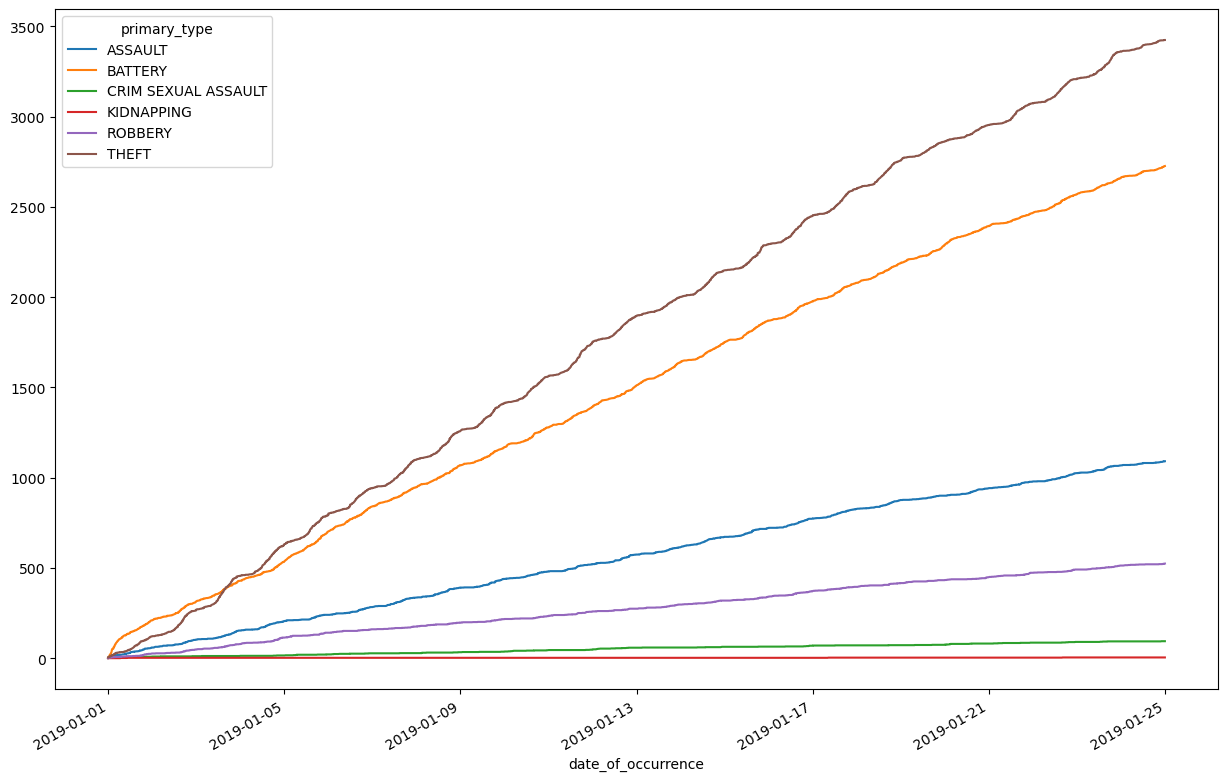

In [139]:
pivot_table.rolling('365D').sum().plot(figsize=(15,10))

<div class="alert alert-block alert-danger">

### Requirement 6:

- Find out which day of the week typically has the fewest crime reports.
- Determine which day of the week usually sees the most crime reports.
    

 </div>

In [147]:
cursor.execute(f"SELECT EXTRACT(DOW FROM date_of_occurrence), count(*)\
                    FROM crimes \
                group by 1")
rows=cursor.fetchall()
dow_crime = pd.DataFrame(rows, columns=['day_of_week','crime_number'])
dow_reference = {0:'Sunday',1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5:'Friday', 6: 'Saturday'}
dow_crime['day_of_week']=dow_crime['day_of_week'].map(dow_reference)
dow_crime.sort_values(by='crime_number')

,day_of_week,crime_number
1,Sunday,1627
6,Monday,1711
5,Saturday,1816
3,Friday,2048
4,Thursday,2232
2,Wednesday,2402
0,Tuesday,2600


**Sunday has the fewest crime while Tuesday has the most crime**